<img src='https://www.inzata.com/wp-content/uploads/2020/03/shutterstock_1562999674-scaled.jpg' width=700>

### **Case Study**: Your are given the dataset on the number of **comfirmed**, **deaths**, and **recovery cases** from 2019 Novel Corona Virus. You are required to complete the following tasks
![](https://www.aljazeera.com/mritems/Images/2020/3/4/b9d6e9c0f8774beda9ce21bb0eacbfe2_7.jpg)

In [106]:
# Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

confirmed  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [107]:
#1
Con = confirmed.melt( id_vars = ["Province/State", "Country/Region","Lat","Long"],
                           var_name = "Date",
                           value_name = "Number of Confirmed")


Dea = deaths.melt( id_vars = ["Province/State", "Country/Region","Lat","Long"],
                           var_name = "Date",
                           value_name = "Number of Deaths")

Rec = recoveries.melt( id_vars = ["Province/State", "Country/Region","Lat","Long"],
                           var_name = "Date",
                           value_name="Number of Recoveries")

*Data Dictionary*

Make sure you read this carefully. This will help you a lot.

| Variable | Definition |
|:--:|:--:|
| Province/State | Name of Province and State within the Country |
| Country/Region | Name of Country |
| Lat | Latitude of the Province |
| Long | Longitude of the Province |
| Day Columns | Report data in cummulative sum |

Write a **function** that reports the __latest__ situation of the Corona Virus in a __given country__.

The function takes one argument as input - the country where the report is from, and prints out the following information:
- The country where the report is from
- Total confirmed cases
- Total death
- Total recovered

In [108]:
# Your code here
# Feel free to add more code and text cells
def report_covid_status(country):
    #filter data country
    confirmed_country = Con[Con["Country/Region"]== country]
    deaths_country    = Dea[Dea["Country/Region"]==country]
    recoveries_country= Rec[Rec["Country/Region"]==country]
    if confirmed_country.empty:
        print(f"No data available for {country}. Please check the country name.")
        return
    #get the latets date
    latest_date = confirmed_country["Date"].max()
    
    #filter data latest date
    confirmed_latest = confirmed_country[confirmed_country["Date"]==latest_date]
    deaths_latest    = deaths_country[deaths_country["Date"]==latest_date]
    recoveries_latest= recoveries_country[recoveries_country["Date"]==latest_date]
    #get the number total confirmed, deaths, recovery
    
    confirmed_total = confirmed_latest["Number of Confirmed"].sum()
    deaths_total    = deaths_latest["Number of Deaths"].sum()
    recoveries_total= recoveries_latest["Number of Recoveries"] .sum()
    
    #print
    
    print(f"Total Confirmed Cases: {confirmed_total}")
    print(f"Total Deaths: {deaths_total}")
    print(f"Total Recovered: {recoveries_total}")
    
report_covid_status("Canada")


Total Confirmed Cases: 4224759
Total Deaths: 44599
Total Recovered: 0


Visualize the situation **until October 31st, 2020**.

Determine the top 5 countries by the total number of confirmed cases
**until October 31st, 2020**.

From those 5 countries, plot the charts for each of them visualising the number of confirmed, death and recovered cases over time from the beginning **until October 31st, 2020**.  

*There should be three plots for confirmed, death and recovered.*

In [109]:
#2
confirmed_distinct = confirmed.groupby('Country/Region').sum()
deaths_distinct = deaths.groupby('Country/Region').sum()
recoveries_distinct = recoveries.groupby('Country/Region').sum()

In [110]:
#2
drop_columns = ["Province/State","Long","Lat"]
confirmed_distinct.drop(drop_columns, axis=1, inplace=True)
deaths_distinct.drop(drop_columns, axis=1, inplace=True)
recoveries_distinct.drop(drop_columns, axis=1, inplace=True)

In [111]:
confirmed_distinct

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [112]:
confirmed_distinct.columns = pd.to_datetime(confirmed_distinct.columns)
deaths_distinct.columns = pd.to_datetime(deaths_distinct.columns)
recoveries_distinct.columns = pd.to_datetime(recoveries_distinct.columns)

C:\Users\trime\AppData\Local\Temp\ipykernel_23052\2670470576.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_distinct.columns = pd.to_datetime(confirmed_distinct.columns)
C:\Users\trime\AppData\Local\Temp\ipykernel_23052\2670470576.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_distinct.columns = pd.to_datetime(deaths_distinct.columns)
C:\Users\trime\AppData\Local\Temp\ipykernel_23052\2670470576.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recoveries_distinct.columns = pd.to_datetime(recoveries_distinct.columns)


In [113]:
top_5_countries_list = confirmed_distinct.loc[:,'2020-10-31'].sort_values(ascending=False).head(5).index
top_5_countries_list

Index(['US', 'India', 'Brazil', 'Russia', 'France'], dtype='object', name='Country/Region')

In [114]:
#2
con = confirmed_distinct.loc[:,:"10/31/20"]
dea = deaths_distinct.loc[:,:"10/31/20"]
rec = recoveries_distinct.loc[:,:"10/31/20"]

In [115]:
top_5_con = con.loc[top_5_countries_list]
top_5_dea = dea.loc[top_5_countries_list]
top_5_rec = rec.loc[top_5_countries_list]

In [132]:
top_5_dea

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,222542,223496,224468,224920,225479,226476,227516,228510,229582,230545
India,0,0,0,0,0,0,0,0,0,0,...,117306,117956,118534,119014,119502,120010,120527,121090,121641,122111
Brazil,0,0,0,0,0,0,0,0,0,0,...,156041,156604,156991,157224,157526,158052,158556,159107,159680,159972
Russia,0,0,0,0,0,0,0,0,0,0,...,25072,25353,25647,25875,26092,26409,26752,27111,27462,27787
France,0,0,0,0,0,0,0,0,0,0,...,34234,34534,34670,34649,35038,35566,35825,36058,36605,36827


<Axes: title={'center': 'Top 5 Recoveries'}>

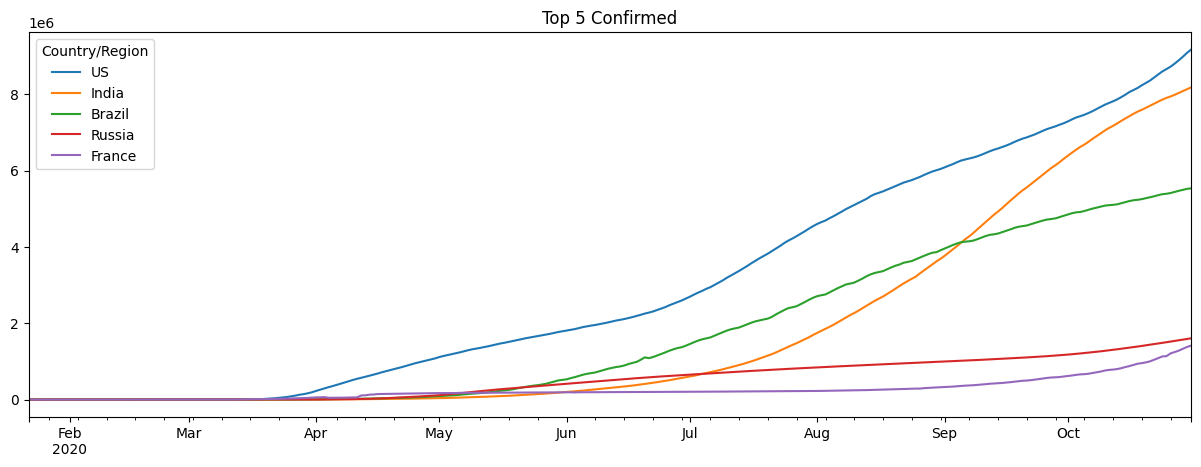

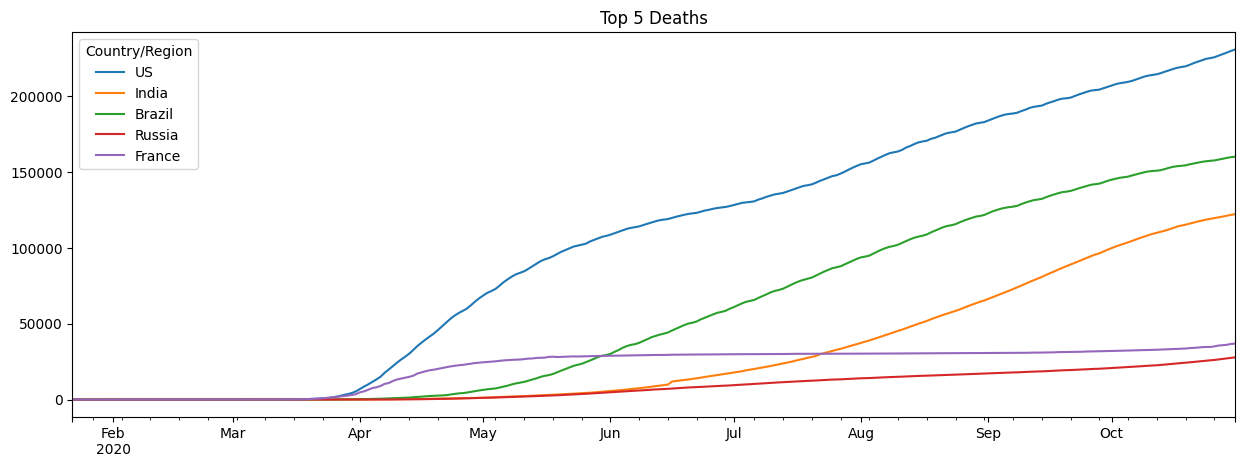

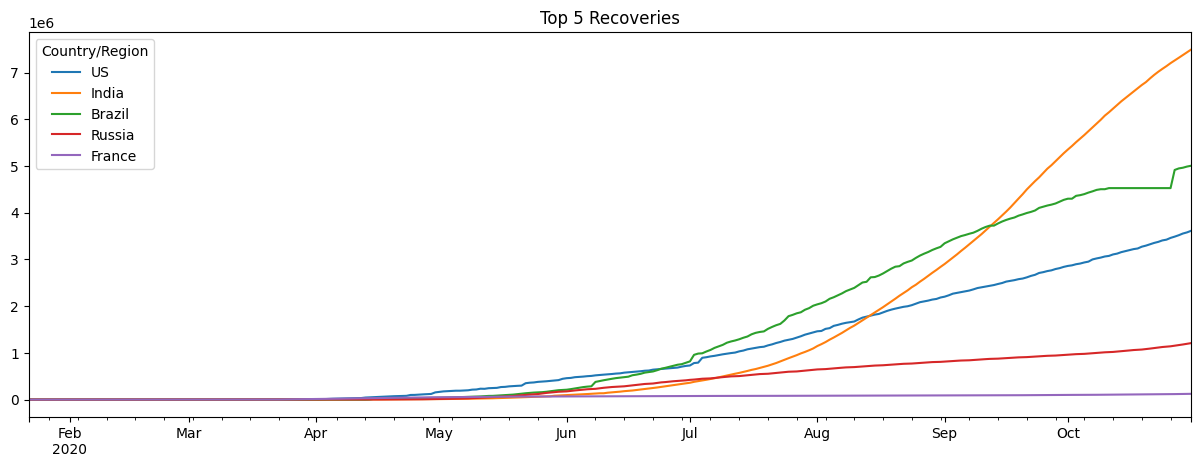

In [116]:
top_5_con.T.plot(figsize=(15,5),title = "Top 5 Confirmed")
top_5_dea.T.plot(figsize=(15,5),title = "Top 5 Deaths")
top_5_rec.T.plot(figsize=(15,5),title = "Top 5 Recoveries")

Before April 1st, there were no or low records of confirmed and death cases for the five countries. The impact of the COVID pandemic became noticeable from April 1st to October 31st. Recovery cases only began to appear at the end of April, indicating the initial efforts to find solutions for COVID.

Number of Confirmed Cases: From April 1st to October 31st, the number of confirmed cases dramatically increased in the US, India, and Brazil, surpassing countries like Russia and France.

Number of Death Cases: During the same period, the number of confirmed cases in the US, India, and Brazil steadily rose, following a parallel pattern. In contrast, the number of death cases in Russia and France increased slightly. France reached its peak in the middle of May, then slightly decreased and remained relatively stable.

Number of Recovery Cases: From May 1st to October 31st, Brazil, the US, India, and Russia showed positive indicators with an increase in the number of recovery cases. India, in particular, exceeded other countries. France, on the other hand, remained almost the same.

**Until October 31st, 2020**, among the top 5 countries
identified, which country/countries should we pay special attention to? Support your arguments with further analysis and visualization.

_Your explaination & analysis here_

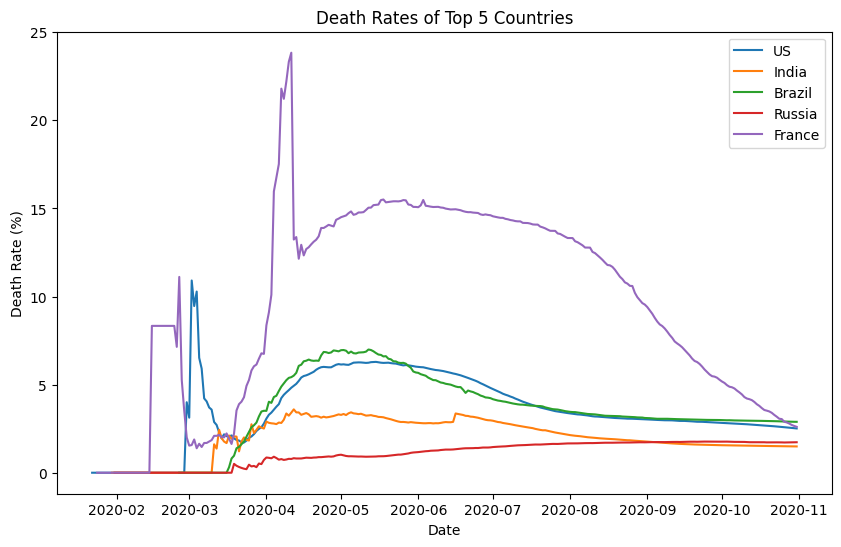

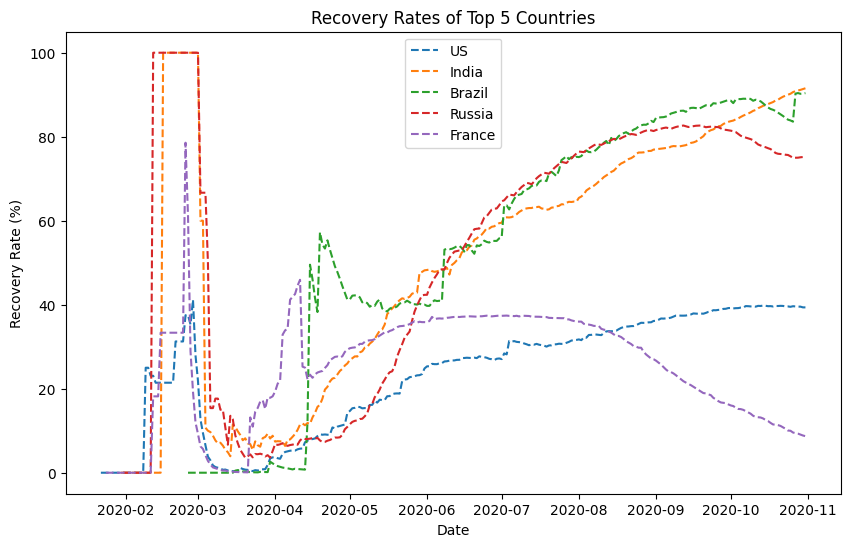

In [173]:
death_rate_top_5 = (top_5_dea / top_5_con) * 100
recovery_rate_top_5 = (top_5_rec / top_5_con) * 100

# Plot the death rates
plt.figure(figsize=(10,6))

for country in death_rate_top_5.index:
    plt.plot(death_rate_top_5.columns, death_rate_top_5.loc[country], label=f'{country}')

plt.title('Death Rates of Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.legend()
plt.show()

# Plot the recovery rates
plt.figure(figsize=(10,6))

for country in recovery_rate_top_5.index:
    plt.plot(recovery_rate_top_5.columns, recovery_rate_top_5.loc[country], label=f'{country}', linestyle='dashed')

plt.title('Recovery Rates of Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('Recovery Rate (%)')
plt.legend()
plt.show()


In [180]:
death_rate_top_5

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.635517,2.621318,2.608822,2.595860,2.583091,2.571249,2.557393,2.542084,2.525771,2.512382
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.511420,1.509415,1.507144,1.504610,1.503845,1.501942,1.499054,1.496999,1.494890,1.492055
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.927952,2.922066,2.915695,2.913392,2.908956,2.902599,2.896772,2.892728,2.890349,2.888748
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.724438,1.723521,1.724446,1.720810,1.715676,1.718059,1.722570,1.726325,1.728874,1.729912
France,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.280888,3.179089,3.063936,3.044281,2.892888,2.855251,2.791881,2.711493,2.653892,2.603726


In [184]:
recovery_rate_top_5

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.709525,39.589385,39.592989,39.504317,39.643033,39.596508,39.545650,39.540594,39.368728,39.367256
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,89.527351,89.780314,89.997369,90.230910,90.620202,90.853773,90.992591,91.154788,91.344725,91.537609
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.933192,84.457747,84.065852,83.874965,83.586703,90.258263,90.394461,90.224681,90.276967,90.382362
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,75.833727,75.712848,75.652878,75.335915,74.982443,74.999447,75.009272,75.103824,75.160048,75.232822
France,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.797202,10.460965,10.042499,9.989571,9.574488,9.424912,9.305985,9.078139,8.861339,8.703008


Brazil, France, and the US needed to address their medical solutions due to their high death rates. Brazil had the highest rate at nearly 2.8, followed by France and the US. Countries with significantly lower death rates were India (1.49) and Russia (1.72).

The US and France had to focus on improving their medical solutions as their recovery rates were alarmingly low, with France having the lowest at 2.6%. In contrast, India demonstrated effective treatment with a recovery rate of nearly 91.53%, followed by Brazil (90.38%) and Russia (75.23%).

Despite Brazil experiencing a considerable death rate, its recovery rate was notably high, ranking second only to India. Conversely, France faced challenges in finding solutions to reduce the death rate and increase recovery rates, as it ranked second highest in death rate and lowest in recovery rate.

The best-performing country was India: Despite having a high number of confirmed cases, India successfully lowered the death rate, ranking the lowest among the five countries at 1.49%. Additionally, India achieved the highest recovery rate at 91.53%.

The worst-performing country was France: Despite recording the lowest number of confirmed cases among the five countries, specifically 10,536 cases, France exhibited an incredibly high death rate (2.60%, ranked second highest). Furthermore, France had the lowest recovery rate at 2.6%.